# **Clustering**

# Iris Dataset

Il dataset Iris è un classico dataset nell'apprendimento automatico e nella statistica, introdotto da Ronald Fisher nel 1936. È comunemente utilizzato per attività di classificazione e clustering.

## Caratteristiche e Struttura
- **Campioni**: 150 campioni di fiori iris.
- **Features**:
  - Lunghezza del sepalo (cm)
  - Larghezza del sepalo (cm)
  - Lunghezza del petalo (cm)
  - Larghezza del petalo (cm)
- **Classi (Etichette Target)**:
  - *Iris-setosa*
  - *Iris-versicolor*
  - *Iris-virginica*

Ogni classe è rappresentata da 50 campioni.

## Caratteristiche Principali
- **Balanced Dataset**: Ogni classe contiene lo stesso numero di campioni.
- **Perfect for Beginners**: a sua semplicità e struttura ben definita lo rendono perfetto per scopi didattici.
- **Separable Classes**:
  - *Iris-setosa* è linearmente separabile dalle altre due classi.
  - *Iris-versicolor* e *Iris-virginica* sono più difficili da separare tra loro.


# Iris Dataset Classes

<table>
    <tr>
        <th>Iris Setosa</th>
        <th>Iris Versicolor</th>
        <th>Iris Virginica</th>
    </tr>
    <tr>
        <td><img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSFn-u9Lagrv8pV4zJ8Z1cEqXNL_uo39CrL6A&s" alt="Iris setosa" width="300" height="300"></td>
        <td><img src="https://www.waternursery.it/document/img_prodotti/616/1646318149.jpeg" alt="Iris versicolor" width="300" height="300"></td>
        <td><img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSQbTwTLA7_7SeTE3B1QOKw0TlB8Rp6NU7vyg&s" alt="Iris virginica" width="300" height="300"></td>
    </tr>
</table>



# **K-means (matematica)**

### NumPy: `np.linalg.norm`
`np.linalg.norm` calcola la norma di un vettore, matrice o array. Viene spesso utilizzato per calcolare distanze o grandezze.

**Sintassi**:
```python
np.linalg.norm(array, axis=None, ord=None)
```

**Parametri**:
- `array`: Array di input per cui viene calcolata la norma.
- `axis`: Specifica l'asse lungo cui calcolare la norma. Se `None`, calcola la norma dell'intero array.
- `ord`: Definisce il tipo di norma (es. 2 per norma Euclidea, 1 per norma Manhattan).

**Esempio**:
```python
import numpy as np
vector = np.array([3, 4])
euclidean_norm = np.linalg.norm(vector)
print(euclidean_norm)  # Output: 5.0 (distanza euclidea)
```

---

### NumPy: `np.allclose`
`np.allclose` verifica se due array sono uguali elemento per elemento entro una certa tolleranza.

**Sintassi**:
```python
np.allclose(array1, array2, rtol=1e-05, atol=1e-08)
```

**Parametri**:
- `array1`, `array2`: Array da confrontare.
- `rtol`: Tolleranza relativa.
- `atol`: Tolleranza assoluta.

**Ritorna**:
- `True` se tutti gli elementi sono entro la tolleranza, altrimenti `False`.

**Example**:
```python
import numpy as np
array1 = np.array([1.0, 2.0, 3.0])
array2 = np.array([1.0, 2.001, 3.0])
is_close = np.allclose(array1, array2, atol=0.01)
print(is_close)  # Output: True

## **Esercizio 1: Implementare algoritmo K-means**

Nel primo esercizio vi è richiesto di implementare l' algoritmo K-means. Di seguito troviamo una guida degli step da seguire:

**1.** Loading dei dati e standardizzazione.

**2.** Applicare PCA per ridurre a 2 dimensioni.

**3.** Impostare parametri per K-means, cioè numero k di clusters, massimo numero di iterazioni e un seed.

**4.** Inizializzazione dei centroidi.

**5.** Iterare l' algoritmo.

### **Algoritmo K-means**

Per iterare l' algoritmo k-means ricordiamo che esso segue degli step ben precisi:

**1.** **Assegnazone dei punti ai clusters**, calcolando la distanza tra ogni punto e i centroidi. Un punto verrà assegnato al centroide più vicino.

**2.** **Aggiornamento centroidi.** Modifico la posizione dei centroidi con la media dei punti che sono stati assegnati a quel cluster.

**3.** **Verifica convergenza**, misurando quanto distano i nuovi centroidi da quelli vecchi. Se questa differenza soddisfa una certa soglia (tolleranza) allora siamo giunti a convergenza. N.B. Se la convergenza non è raggiunta si continuerà ad iterare. Per continuare ad iterare devo però sostituire i nuovi centroidi.



In [139]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# 1. PREPARAZIONE DATI
# Carica il dataset Iris
iris = load_iris()
X = iris.data    # Matrice dei dati: 150 fiori × 4 caratteristiche
y = iris.target  # Etichette vere (non usate nel clustering)

# Standardizza i dati per dare uguale peso a tutte le caratteristiche
# svolgimento...
scaler = StandardScaler()
X_std = scaler.fit_transform(X)


# Applica PCA per ridurre a 2 dimensioni
# svolgimento...
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

In [140]:
# 2. IMPOSTAZIONE PARAMETRI

np.random.seed(42)  # Per riproducibilità
k = 3               # Numero di cluster desiderati
max_iters = 20     # Numero massimo di iterazioni

In [141]:
# 3. INIZIALIZZAZIONE CENTROIDI
# Seleziona k punti casuali dal dataset come centroidi iniziali
# svolgimento...
numero_campioni=X_pca.shape[0]
indici_casuali = np.random.choice(numero_campioni, size=k, replace=False)
centroide = X_pca[indici_casuali]

In [142]:
# 4. ALGORITMO K-MEANS
for iterazione in range(max_iters):
    # FASE 1: Assegnazione punti ai cluster
    # Calcola la distanza di ogni punto da ogni centroide
    # svolgimento...
    distanza = np.linalg.norm(X_pca[:, np.newaxis] - centroide, axis=2)

    # Assegna ogni punto al centroide più vicino
    labels = np.argmin(distanza, axis=1)

    
    # FASE 2: Aggiornamento centroidi
    # Calcola i nuovi centroidi come la media dei punti assegnati a ciascun cluster   
    # svolgimento... 
    nuovo_centroide = np.array([X_pca[labels == i].mean(axis=0) for i in range(k)])
    
    # FASE 3: Verifica convergenza
    # Calcola se i centroidi si sono spostati significativamente
    # svolgimento...
    if np.allclose(centroide, nuovo_centroide, atol=1e-4):
        print(f"Convergenza raggiunta all'iterazione {iterazione}")
        break

    
    # Aggiorna i centroidi per la prossima iterazione
    # svolgimento...
    centroide= nuovo_centroide

final_labels = labels  #salva i risultati finali 
final_centroide = centroide 

Convergenza raggiunta all'iterazione 8


### **Visualizzazione**

Utilizzate la seguente funzione per visualizzare il risultato dell' algoritmo. La funzione richiede 3 parametri:

**1.** I dati su cui è stato applicato l' algoritmo di clustering.

**2.** Le labels all' ultima iterazione dell' algoritmo.

**3.** I centroidi all' ultima iterazione dell' aloritmo.

In [143]:
def visualizza_clusters(X, labels, centroids):
    """
    Visualizza i risultati del clustering.
    
    Parametri:
    X: array dei dati (standardizzati)
    labels: array delle etichette dei cluster
    centroids: array dei centroidi
    """
    plt.figure(figsize=(10, 6))
    
    colori = ['red', 'green', 'blue']
    
    for i in range(len(np.unique(labels))):
        mask = labels == i
        plt.scatter(X[mask, 0], X[mask, 1],
                   c=colori[i], 
                   label=f'Cluster {i}',
                   alpha=0.6)
    
    plt.scatter(centroids[:, 0], centroids[:, 1],
                c='black',
                marker='x',
                s=200,
                label='Centroidi')
    
    plt.xlabel("Prima caratteristica")
    plt.ylabel("Seconda caratteristica")
    plt.title("Risultati K-means")
    plt.legend()
    plt.show()


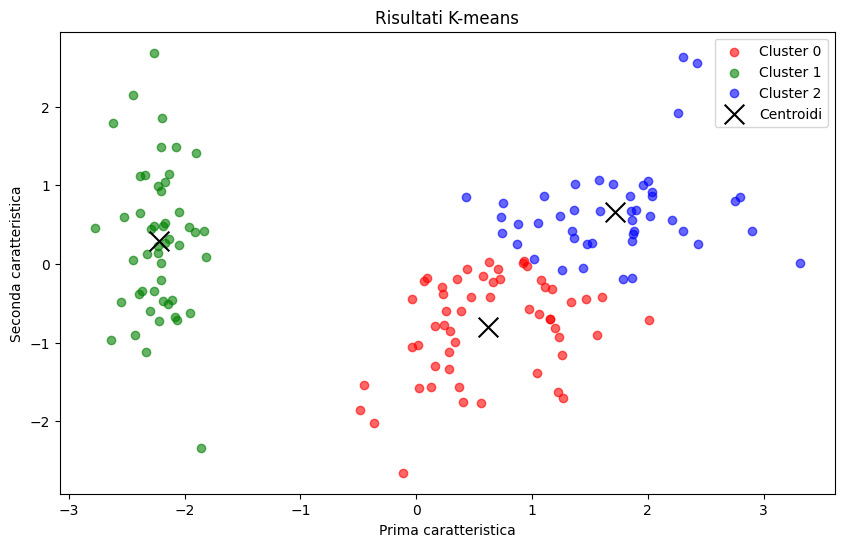

In [144]:
# Chiamare la funzione visualizza clusters

# svolgimento...
visualizza_clusters(X_pca, final_labels, final_centroide)


## **Esercizio 2: Valutare l' algoritmo di clustering**

Scriviamo una funzione che utilizzi diverse metriche per valutare l' algoritmo di clustering. ATTENZIONE: questa funzione potrà essere riutilizzata più avanti anche per altri algoritmi.

Le metriche da implementare sono le seguenti:

* **Silhouette score**

* **Davies Bouldin score**

* **Rand Index**

* **Adjusted Rand Index**

Per implementarle utilizzeremo direttamente le loro implementazioni fornite da `sklearn`.

## **Sintassi**

```python
from sklearn.metrics import silhouette_score, davies_bouldin_score
silhouette = silhouette_score(X, labels)
dbs = davies_bouldin_score(X, labels) # entrambe le metriche richiedono i dati e le labels
print(silhouette)
print(dbs)
```

```python
from sklearn.metrics import rand_score, adjusted_rand_score
rand = rand_score(y, labels)
adj_rand = adjusted_rand_score(y, labels) # Queste due metriche invece richiedono le lables originali e quelle assegnate dall' algoritmo
print(rand)
print(adj_rand)
```

In [145]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, rand_score, adjusted_rand_score

# VALUTAZIONE DEL CLUSTERING
def evaluate_clustering(labels, X, y):

    silhouette = silhouette_score(X, labels)

    dbi = davies_bouldin_score(X, labels)

    rand = rand_score(y, labels)

    adj_rand = adjusted_rand_score(y, labels)
    
    return silhouette, dbi, rand, adj_rand


In [146]:
silhouette, dbi, rand, adj_rand = evaluate_clustering(labels, X, y)

print(f"Silhouette Score: {silhouette:.4f}")
print(f"Davies-Bouldin Index: {dbi:.4f}")
print(f"Rand Index: {rand:.4f}")
print(f"Adjusted Rand Index: {adj_rand:.4f}")

Silhouette Score: 0.4938
Davies-Bouldin Index: 0.7682
Rand Index: 0.8236
Adjusted Rand Index: 0.6011


## **Esercizio 3: Clustering al variare dei parametri**

Vediamo adesso come variano le prestazioni del clustering al variare di due parametri: il numero di clusters e il numero di componenti di PCA.

Per semplicità utilizzeremo l' implementazione di `sklearn` per l' algoritmo K-means.

Alla fine bisognerà stampare la configurazione di parametri che ci fa ottenere le migliori prestazioni utilizzando l' Adjusted Rand Index come metrica.

### **Sintassi**:
```python
kmeans = KMeans(n_clusters=n)
labels = kmeans.fit_predict(data)
```

In [161]:
from sklearn.cluster import KMeans

n_pca_components = [2,3,4]
n_clusters = [2,3,4]

# svolgimento...

best_score = -1
best_config = None

for n_pca in n_pca_components:
    pca = PCA(n_components=n_pca)
    X_pca_temp = pca.fit_transform(X_std)

    for k in n_clusters:
        kmeans = KMeans(n_clusters=k, random_state=42)
        labels_predetti = kmeans.fit_predict(X_pca_temp)
        
        ari = adjusted_rand_score(y, labels_predetti) #Calcolo Adjusted Rand Index

        print(f"PCA: {n_pca}, Cluster: {k} => Adjusted Rand Index: {ari:.3f}")

        if ari > best_score:
            best_score = ari
            best_config = (n_pca, k)

print("\nConfigurazione migliore:")
print(f"PCA: {best_config[0]}, Cluster: {best_config[1]}")
print(f"Adjusted Rand Index: {best_score:.3f}")

PCA: 2, Cluster: 2 => Adjusted Rand Index: 0.568
PCA: 2, Cluster: 3 => Adjusted Rand Index: 0.620
PCA: 2, Cluster: 4 => Adjusted Rand Index: 0.451
PCA: 3, Cluster: 2 => Adjusted Rand Index: 0.568
PCA: 3, Cluster: 3 => Adjusted Rand Index: 0.620
PCA: 3, Cluster: 4 => Adjusted Rand Index: 0.473
PCA: 4, Cluster: 2 => Adjusted Rand Index: 0.568
PCA: 4, Cluster: 3 => Adjusted Rand Index: 0.620
PCA: 4, Cluster: 4 => Adjusted Rand Index: 0.473

Configurazione migliore:
PCA: 2, Cluster: 3
Adjusted Rand Index: 0.620


/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:8

## **Visualizzazione**

La seguente funzione di visualizzazione mostra la differenza tra i dati assegnati nei clusters e la loro effettiva divisione in classi.

In [148]:
import matplotlib.pyplot as plt
import numpy as np

def plot_clusters_vs_truth(X_2d, labels, y_true=None, cluster_centers=None, 
                          cluster_colors=None, class_colors=None, 
                          class_names=None, title_clusters="Risultati Clustering", title_truth="Vere Classi"):
    """
    Visualizza affiancati (subplot 1x2) i dati clusterizzati e la distribuzione delle vere classi.
    
    Parametri obbligatori minimi:
        - X_2d: array bidimensionale (come PCA) con shape (n_samples, 2)
        - labels: array delle etichette di cluster per ciascun punto
        - y_true: array delle etichette vere (opzionale; se non fornito mostra solo clustering)
        - cluster_centers: array centroidi (opzionale; se fornito li visualizza)
        - cluster_colors: lista di colori per i cluster (opzionale)
        - class_colors: lista di colori per le classi vere (opzionale)
        - class_names: lista di nomi per le classi vere (opzionale)
        - title_clusters, title_truth: titoli dei plot (opzionali)
    """
    n_clusters = len(np.unique(labels))
    if cluster_colors is None:
        cmap = plt.get_cmap("tab10")
        cluster_colors = [cmap(i) for i in range(n_clusters)]
    if y_true is not None:
        n_classes = len(np.unique(y_true))
        if class_colors is None:
            cmap2 = plt.get_cmap("tab10")
            class_colors = [cmap2(i) for i in range(n_classes)]
    
    fig, axs = plt.subplots(1, 2 if y_true is not None else 1, figsize=(12, 5) if y_true is not None else (6, 5))
    axs = np.array(axs).reshape(-1)
    
    # Clustering plot
    for i, cluster_label in enumerate(np.unique(labels)):
        axs[0].scatter(X_2d[labels == cluster_label, 0], X_2d[labels == cluster_label, 1], 
                       color=cluster_colors[i], alpha=0.5, label=f"Cluster {cluster_label}")
    if cluster_centers is not None:
        axs[0].scatter(cluster_centers[:,0], cluster_centers[:,1], c='red', marker='x', s=100, label='Centroids')
    axs[0].set_xlabel("Principal Component 1")
    axs[0].set_ylabel("Principal Component 2")
    axs[0].set_title(title_clusters)
    axs[0].legend(loc='best')
    axs[0].set_aspect('auto')
    
    # True class plot
    if y_true is not None:
        for i, class_label in enumerate(np.unique(y_true)):
            label_name = class_names[class_label] if class_names is not None else f"Class {class_label}"
            axs[1].scatter(X_2d[y_true == class_label, 0], X_2d[y_true == class_label, 1],
                           color=class_colors[i], alpha=0.5, label=label_name)
        axs[1].set_xlabel("Principal Component 1")
        axs[1].set_ylabel("Principal Component 2")
        axs[1].set_title(title_truth)
        axs[1].legend(loc='best')
        axs[1].set_aspect('auto')
    plt.tight_layout()
    plt.show()


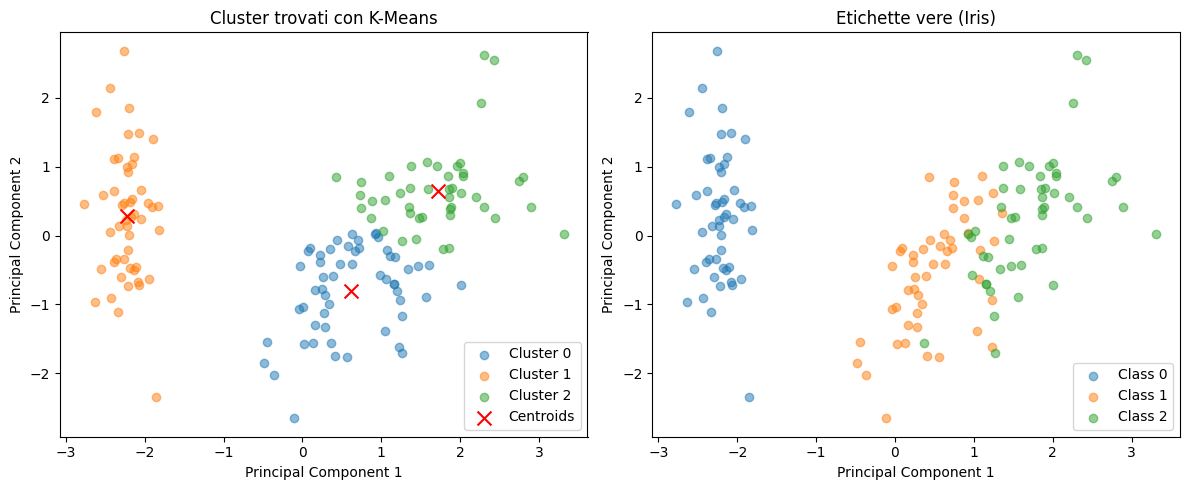

In [149]:
# Utilizzare la funzione plot_clusters_vs_truth per visualizzare i risultati
# svolgimento...
plot_clusters_vs_truth (X_pca, final_labels, y_true=y, cluster_centers=final_centroide, title_clusters="Cluster trovati con K-Means", title_truth="Etichette vere (Iris)")

## **Esercizio 4: Gaussian Mixture Models**
`GaussianMixture` modella i dati utilizzando una miscela di distribuzioni gaussiane. 
Vogliamo valutare anche questo modello al variare di numero di componenti di PCA e numero di clusters.

**Syntax**:
```python
gmm = GaussianMixture(n_components=n)
labels = gmm.fit_predict(data)
```

In [165]:
from sklearn.mixture import GaussianMixture

n_pca_components = [2,3,4]
n_clusters = [2,3,4]

# svolgimento...

best_score = -1
best_config = None

for n_pca in n_pca_components:
    pca = PCA(n_components=n_pca)
    X_pca_temp = pca.fit_transform(X_std)

    for n in n_clusters:
        gmm = GaussianMixture(n_components=n, random_state=42)
        labels_predetti = gmm.fit_predict(X_pca_temp)

        ari = adjusted_rand_score(y, labels_predetti)
        print(f"PCA: {n_pca}, GMM componenti: {n} => Adjusted Rand Index: {ari:.3f}")

        if ari > best_score:
            best_score = ari
            best_config = (n_pca, n)
            best_labels = labels_predetti
            best_X_pca = X_pca_temp  # salva i dati 2D per visualizzazione
            
print("\nConfigurazione migliore trovata (GMM):")
print(f"PCA componenti: {best_config[0]}, GMM componenti: {best_config[1]}")
print(f"ARI migliore: {best_score:.3f}")


PCA: 2, GMM componenti: 2 => Adjusted Rand Index: 0.568
PCA: 2, GMM componenti: 3 => Adjusted Rand Index: 0.729
PCA: 2, GMM componenti: 4 => Adjusted Rand Index: 0.642
PCA: 3, GMM componenti: 2 => Adjusted Rand Index: 0.568
PCA: 3, GMM componenti: 3 => Adjusted Rand Index: 0.886
PCA: 3, GMM componenti: 4 => Adjusted Rand Index: 0.781
PCA: 4, GMM componenti: 2 => Adjusted Rand Index: 0.568
PCA: 4, GMM componenti: 3 => Adjusted Rand Index: 0.904
PCA: 4, GMM componenti: 4 => Adjusted Rand Index: 0.782

Configurazione migliore trovata (GMM):
PCA componenti: 4, GMM componenti: 3
ARI migliore: 0.904


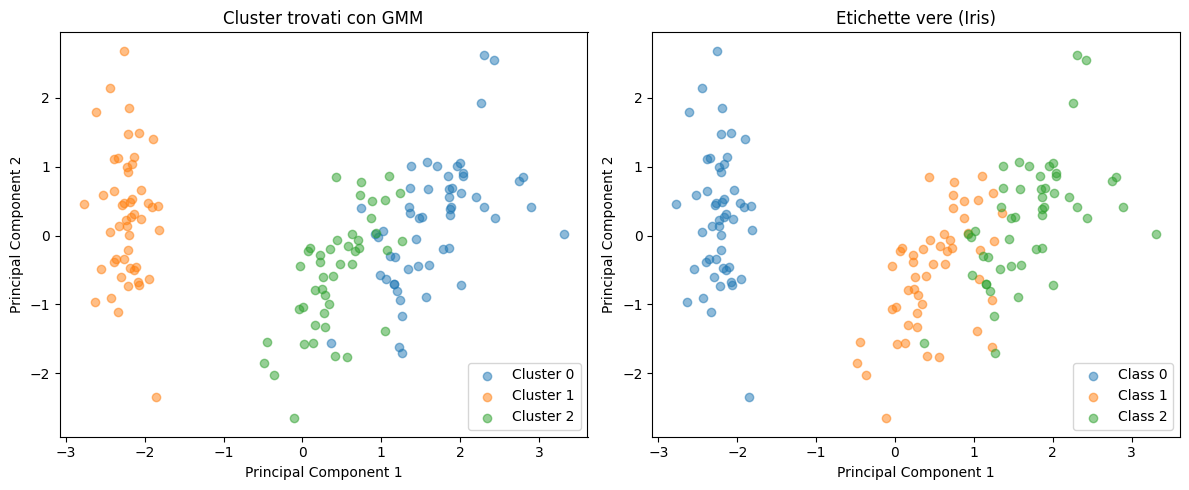

In [166]:
# visualizza i risultati del clustering GMM
# svolgimento...

plot_clusters_vs_truth(best_X_pca, best_labels, y_true=y, title_clusters="Cluster trovati con GMM", title_truth="Etichette vere (Iris)")

## **Esercizio 5: Agglomerative Clustering**

Agglomerative Clustering utilizza un approccio gerarchico per raggruppare i punti dati. Il **linkage method** determina come viene calcolata la distanza tra i cluster quando vengono uniti.

### Scikit-Learn: `AgglomerativeClustering`
`AgglomerativeClustering` effettua clustering gerarchico con uno specifico metodo di **linkage**.

**Syntax**:
```python
clustering = AgglomerativeClustering(n_clusters=n, linkage='method')
labels = clustering.fit_predict(data)
```

Anche in questo caso dovrete implementare l' algoritmo e valutarlo al variare del numero di clusters e numero di componenti della PCA.

### **Esercizio 5.1: Single Linkage**

La distanza tra due cluster è definita come la distanza minima tra qualsiasi coppia di punti appartenenti ai cluster (vicino più prossimo).

#### Vantaggi

* Rapido ed efficiente per dataset di grandi dimensioni.

* Utile per rilevare cluster allungati o di forma irregolare.

#### Svantaggi

* Può causare effetti di "concatenazione", collegando i cluster in sequenza anziché formare gruppi compatti.

#### Formula
$$ d_{single}(C_1, C_2) = \min_{x \in C_1, y \in C_2} ||x - y|| $$

In [167]:
from sklearn.cluster import AgglomerativeClustering

iris = load_iris()
X, y = iris.data, iris.target


n_pca_components = [2, 3, 4]  
n_clusters = [2, 3, 4]  

# svolgimento...

best_score = -1
best_config = None

for n_pca in n_pca_components:
    pca = PCA(n_components=n_pca)
    X_pca_temp = pca.fit_transform(X_std)

    for k in n_clusters:
        clustering = AgglomerativeClustering(n_clusters=k, linkage='single')
        labels_predetti = clustering.fit_predict(X_pca_temp)

        ari = adjusted_rand_score(y, labels_predetti)
        print(f"PCA: {n_pca}, Cluster: {k} => ARI: {ari:.3f}")

        if ari > best_score:
            best_score = ari
            best_config = (n_pca, k)
            best_labels = labels_predetti
            best_X_pca = X_pca_temp


print("\nConfigurazione migliore trovata (Agglomerative - Single Linkage):")
print(f"PCA componenti: {best_config[0]}, Cluster: {best_config[1]}")
print(f"ARI migliore: {best_score:.3f}")


PCA: 2, Cluster: 2 => ARI: 0.568
PCA: 2, Cluster: 3 => ARI: 0.558
PCA: 2, Cluster: 4 => ARI: 0.552
PCA: 3, Cluster: 2 => ARI: 0.568
PCA: 3, Cluster: 3 => ARI: 0.558
PCA: 3, Cluster: 4 => ARI: 0.552
PCA: 4, Cluster: 2 => ARI: 0.568
PCA: 4, Cluster: 3 => ARI: 0.558
PCA: 4, Cluster: 4 => ARI: 0.552

Configurazione migliore trovata (Agglomerative - Single Linkage):
PCA componenti: 2, Cluster: 2
ARI migliore: 0.568


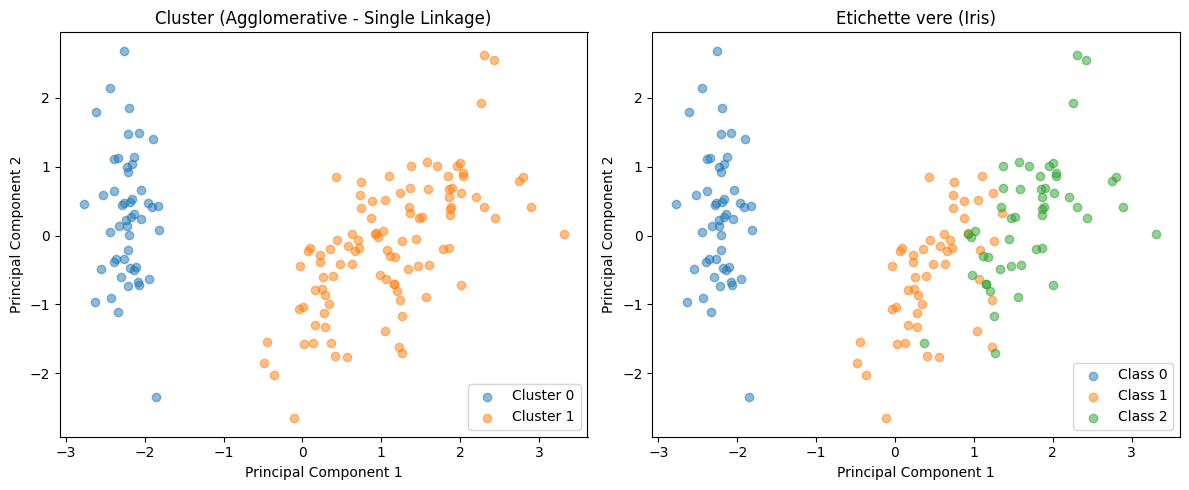

In [168]:
# visualizzare i risultati del clustering gerarchico
# svolgimento...
plot_clusters_vs_truth(best_X_pca, best_labels, y_true=y, title_clusters="Cluster (Agglomerative - Single Linkage)", title_truth="Etichette vere (Iris)")

### **Esercizio 5.2: Complete Linkage**
La distanza tra due cluster è definita come la distanza massima tra qualsiasi coppia di punti appartenenti ai clusters (vicino più lontano).

#### Vantaggi

* **Cluster più compatti:** Produce gruppi densi e ben separati.

* **Minore concatenamento:** Riduce l'effetto di "catena" tipico del Single Linkage.

#### Svantaggi

* **Sensibilità agli outlier:** Essendo basato sulle distanze massime, valori anomali influenzano fortemente i risultati.

* **Dipendenza dalla scala:** Richiede una buona standardizzazione delle feature.


#### Formula
$$ d_{complete}(C_1, C_2) = \max_{x \in C_1, y \in C_2} ||x - y|| $$

In [170]:
iris = load_iris()
X, y = iris.data, iris.target


n_pca_components = [2, 3, 4]  
n_clusters = [2, 3, 4]  

# svolgimento...

best_score = -1
best_config = None

for n_pca in n_pca_components:
    pca = PCA(n_components=n_pca)
    X_pca_temp = pca.fit_transform(X_std)

    for k in n_clusters:
        clustering = AgglomerativeClustering(n_clusters=k, linkage='complete')
        labels_predetti = clustering.fit_predict(X_pca_temp)

        ari = adjusted_rand_score(y, labels_predetti)
        print(f"PCA: {n_pca}, Cluster: {k} => Adjusted Rand Index: {ari:.3f}")

        if ari > best_score:
            best_score = ari
            best_config = (n_pca, k)
            best_labels = labels_predetti
            best_X_pca = X_pca_temp

print("\nConfigurazione migliore trovata (Agglomerative - Complete Linkage):")
print(f"PCA componenti: {best_config[0]}, Cluster: {best_config[1]}")
print(f"ARI migliore: {best_score:.3f}")

PCA: 2, Cluster: 2 => Adjusted Rand Index: 0.171
PCA: 2, Cluster: 3 => Adjusted Rand Index: 0.625
PCA: 2, Cluster: 4 => Adjusted Rand Index: 0.611
PCA: 3, Cluster: 2 => Adjusted Rand Index: 0.531
PCA: 3, Cluster: 3 => Adjusted Rand Index: 0.550
PCA: 3, Cluster: 4 => Adjusted Rand Index: 0.536
PCA: 4, Cluster: 2 => Adjusted Rand Index: 0.410
PCA: 4, Cluster: 3 => Adjusted Rand Index: 0.573
PCA: 4, Cluster: 4 => Adjusted Rand Index: 0.533

Configurazione migliore trovata (Agglomerative - Complete Linkage):
PCA componenti: 2, Cluster: 3
ARI migliore: 0.625


In [155]:
# visualizzare i risultati del clustering gerarchico
# svolgimento...
plot_clusters_vs_truth(best_X_pca, best_labels, y_true=y, title_clusters="Cluster (Agglomerative - Single Linkage)", title_truth="Etichette vere (Iris)")

### **Esercizio 5.3: Average Linkage**
La distanza tra due cluster è definita come la distanza media tra tutte le coppie di punti appartenenti ai diversi cluster.

#### Vantaggi

* **Bilanciamento ottimale:** Mitiga l'impatto degli outlier e delle dimensioni dei cluster

* **Cluster più naturali:** Produce raggruppamenti spesso più coerenti con la struttura reale dei dati.

#### Svantaggi

* **Costo computazionale elevato:** Richiede il calcolo di tutte le distanze pairwise, diventando proibitivo per dataset molto grandi.

* **Sensibilità alla densità:** Può essere influenzato da cluster con densità disomogenee.


#### Formula
$$ d_{average}(C_1, C_2) = \frac{1}{|C_1| \cdot |C_2|} \sum_{x \in C_1, y \in C_2} ||x - y|| $$

In [173]:
iris = load_iris()
X, y = iris.data, iris.target


n_pca_components = [2, 3, 4]  
n_clusters = [2, 3, 4]  

# svolgimento...
best_score = -1
best_config = None

for n_pca in n_pca_components:
    pca = PCA(n_components=n_pca)
    X_pca_temp = pca.fit_transform(X_std)

    for k in n_clusters:
        clustering = AgglomerativeClustering(n_clusters=k, linkage='average')
        labels_predetti = clustering.fit_predict(X_pca_temp)

        ari = adjusted_rand_score(y, labels_predetti)
        print(f"PCA: {n_pca}, Cluster: {k} => ARI: {ari:.3f}")

        if ari > best_score:
            best_score = ari
            best_config = (n_pca, k)
            best_labels = labels_predetti
            best_X_pca = X_pca_temp

print("\nConfigurazione migliore trovata (Agglomerative - Average Linkage):")
print(f"PCA componenti: {best_config[0]}, Cluster: {best_config[1]}")
print(f"ARI migliore: {best_score:.3f}")


PCA: 2, Cluster: 2 => ARI: 0.568
PCA: 2, Cluster: 3 => ARI: 0.558
PCA: 2, Cluster: 4 => ARI: 0.637
PCA: 3, Cluster: 2 => ARI: 0.568
PCA: 3, Cluster: 3 => ARI: 0.562
PCA: 3, Cluster: 4 => ARI: 0.552
PCA: 4, Cluster: 2 => ARI: 0.568
PCA: 4, Cluster: 3 => ARI: 0.562
PCA: 4, Cluster: 4 => ARI: 0.552

Configurazione migliore trovata (Agglomerative - Average Linkage):
PCA componenti: 2, Cluster: 4
ARI migliore: 0.637


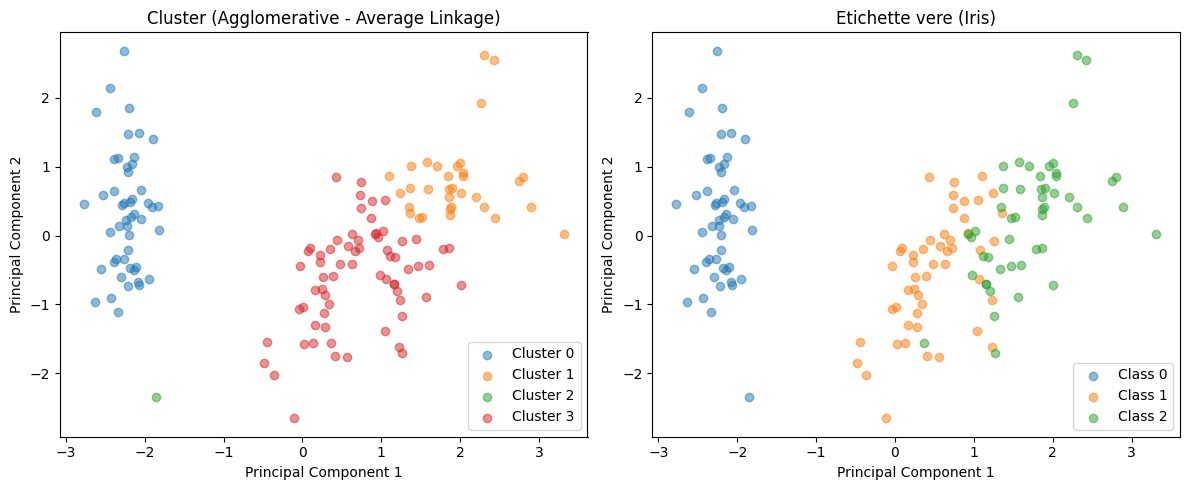

In [174]:
# visualizzare i risultati del clustering gerarchico
# svolgimento...
plot_clusters_vs_truth( best_X_pca, best_labels, y_true=y, title_clusters="Cluster (Agglomerative - Average Linkage)", title_truth="Etichette vere (Iris)")

### **Esercizio 5.4: Ward Linkage**
Unisce i cluster la cui fusione determina il minimo incremento della varianza totale intra-cluster (minimizza la somma dei quadrati degli scarti).

#### Vantaggi

* **Cluster compatti e sferici:** Ideale per raggruppamenti di forma regolare.

* **Ottimizzazione della varianza:** Massimizza l'omogeneità interna ai cluster.

#### Svantaggi

* **Elevato costo computazionale:** Poco efficiente su dataset di grandi dimensioni.

* **Ipotesi restrittive:** Assume una struttura di cluster isotropica.


#### Formula
$$ d_{ward}(C_1, C_2) = \Delta \text{variance} $$

In [171]:
iris = load_iris()
X, y = iris.data, iris.target


n_pca_components = [2, 3, 4]  
n_clusters = [2, 3, 4]  

best_score = -1
best_config = None

for n_pca in n_pca_components:
    pca = PCA(n_components=n_pca)
    X_pca_temp = pca.fit_transform(X_std)

    for k in n_clusters:
        clustering = AgglomerativeClustering(n_clusters=k, linkage='ward')
        labels_predetti = clustering.fit_predict(X_pca_temp)

        ari = adjusted_rand_score(y, labels_predetti)
        print(f"PCA: {n_pca}, Cluster: {k} => ARI: {ari:.3f}")

        if ari > best_score:
            best_score = ari
            best_config = (n_pca, k)
            best_labels = labels_predetti
            best_X_pca = X_pca_temp

print("\nConfigurazione migliore trovata (Agglomerative - Ward Linkage):")
print(f"PCA componenti: {best_config[0]}, Cluster: {best_config[1]}")
print(f"ARI migliore: {best_score:.3f}")


PCA: 2, Cluster: 2 => ARI: 0.568
PCA: 2, Cluster: 3 => ARI: 0.586
PCA: 2, Cluster: 4 => ARI: 0.452
PCA: 3, Cluster: 2 => ARI: 0.544
PCA: 3, Cluster: 3 => ARI: 0.630
PCA: 3, Cluster: 4 => ARI: 0.577
PCA: 4, Cluster: 2 => ARI: 0.544
PCA: 4, Cluster: 3 => ARI: 0.615
PCA: 4, Cluster: 4 => ARI: 0.588

Configurazione migliore trovata (Agglomerative - Ward Linkage):
PCA componenti: 3, Cluster: 3
ARI migliore: 0.630


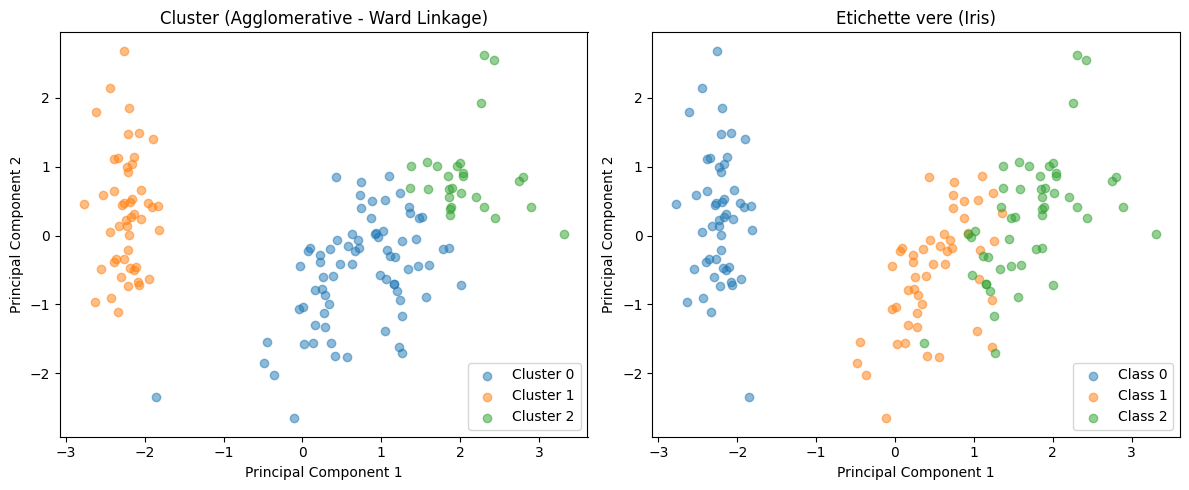

In [172]:
# visualizza i risultati del clustering gerarchico
# svolgimento...

plot_clusters_vs_truth( best_X_pca, best_labels, y_true=y, title_clusters="Cluster (Agglomerative - Ward Linkage)", title_truth="Etichette vere (Iris)")

# **Esercizio 6: Testare tutti i linkage method**

Infine dovrete testare contemporaneamente tutti i metod per ottenere tra tutti quello che raggiunge la performance migliore. Dovrete inoltre trovare la configurazione migliore. 

In [160]:
iris = load_iris()
X, y = iris.data, iris.target


n_pca_components = [2, 3, 4]  
n_clusters = [2, 3, 4]  
linkage_methods = ['average', 'single', 'complete', 'ward']  


# svolgimento...


best_score = -1
best_config = None

for linkage in linkage_methods:
    for n_pca in n_pca_components:
        pca = PCA(n_components=n_pca)
        X_pca_temp = pca.fit_transform(X_std)

        for k in n_clusters:
            # ward linkage richiede euclidean, quindi non è compatibile con n_components < n_features se non standardizzato
            if linkage == 'ward' and n_pca < 2:
                continue

            clustering = AgglomerativeClustering(n_clusters=k, linkage=linkage)
            labels_predetti = clustering.fit_predict(X_pca_temp)

            ari = adjusted_rand_score(y, labels_predetti)
            print(f"Linkage: {linkage}, PCA: {n_pca}, Cluster: {k} => ARI: {ari:.3f}")

            if ari > best_score:
                best_score = ari
                best_config = (linkage, n_pca, k)
                best_labels = labels_predetti
                best_X_pca = X_pca_temp


print("\nConfigurazione migliore trovata (tutti i linkage):")
print(f"Linkage: {best_config[0]}, PCA componenti: {best_config[1]}, Cluster: {best_config[2]}")
print(f"ARI migliore: {best_score:.3f}")
